**Installing libraries**

In [ ]:
!pip install matplotlib
!pip install numpy

### Importing Libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Creating random vectors x and y


n is length of the vectors


In [ ]:
n = 5

Generating Random vectors from Gaussian distribution by numpy random library by assigning size variable

In [ ]:
x, y = np.random.standard_normal(size=(n, 1)), np.random.standard_normal(size=(n, 1))

### Plotting the random graph 

* Add extra point that is copy of first point to make the last edge $(x_n, y_n) - (x_1, y_1)$
* Use the `plt.plot` to plot line chart aka edges
* Use markers to plot points

In [ ]:
x, y = np.concat([x, x[:1]], axis=0), np.concat([y, y[:1]], axis=0)

In [25]:
def plot_graph(X, Y, i=None):
    plt.plot(X, Y)
    plt.plot(X, Y, 'r+')
    plt.title(f'Random Graph for n={n}' + f' Iteration no. {i}'if i is not None else '')

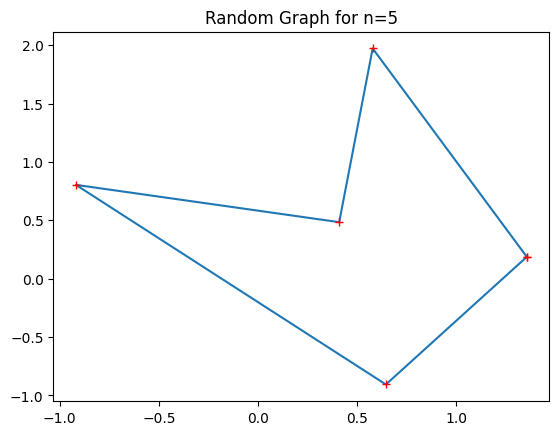

In [13]:
plot_graph(x, y)
plt.show()

In [19]:
from typing import Tuple


def new_graph(xs:np.array, ys:np.array)->Tuple[np.array, np.array]:
    new_x, new_y = np.concat([np.mean([xs[i], xs[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0), np.concat([np.mean([ys[i], ys[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0)
    return np.concat([new_x, new_x[:1]], axis=0), np.concat([new_y, new_y[:1]], axis=0)

In [26]:
new_x, new_y = new_graph(x, y)

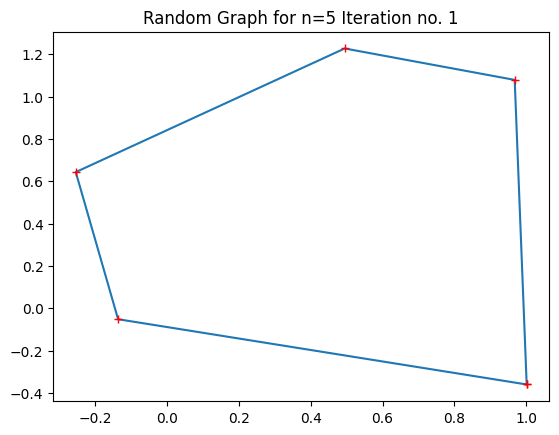

In [27]:
plot_graph(new_x, new_y, 1)
plt.show()

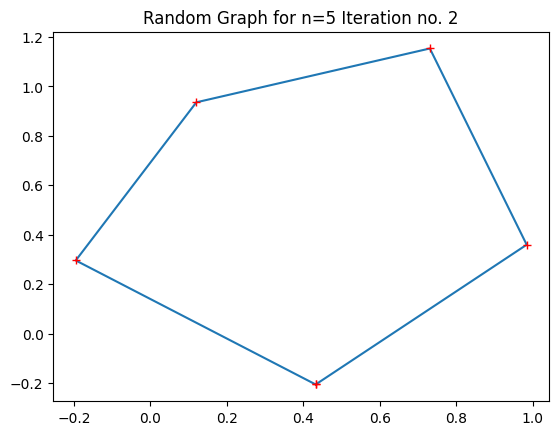

In [28]:
new_x, new_y = new_graph(new_x, new_y)
plot_graph(new_x, new_y, i=2)
plt.show()

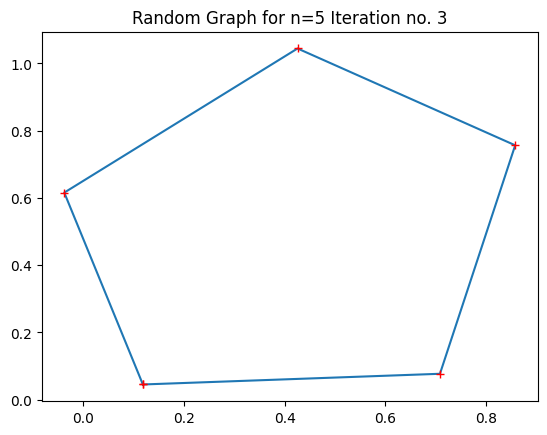

In [29]:
new_x, new_y = new_graph(new_x, new_y)
plot_graph(new_x, new_y, i=3)
plt.show()

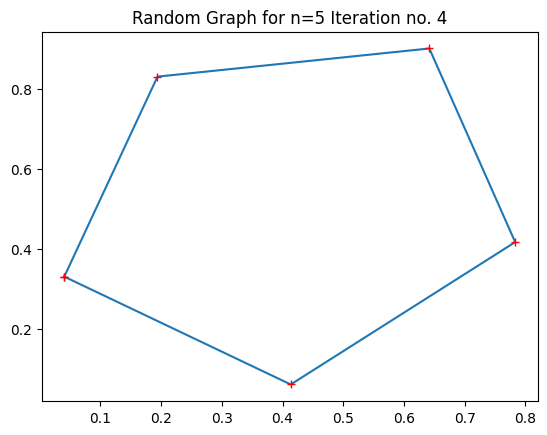

In [30]:
new_x, new_y = new_graph(new_x, new_y)
plot_graph(new_x, new_y, i=4)
plt.show()

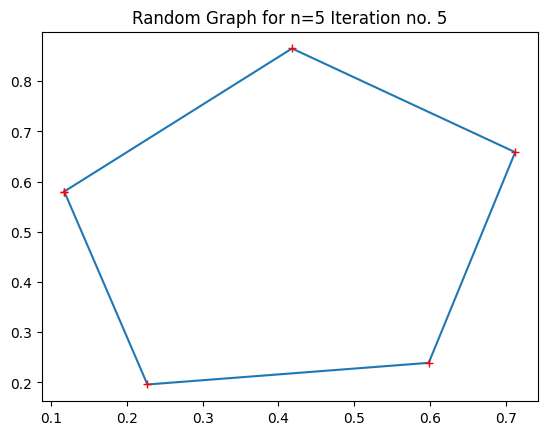

In [31]:
new_x, new_y = new_graph(new_x, new_y)
plot_graph(new_x, new_y, i=5)
plt.show()

In [32]:
from typing import Tuple


def new_graph_normalized(xs:np.array, ys:np.array)->Tuple[np.array, np.array]:
    new_x, new_y = np.concat([np.mean([xs[i], xs[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0), np.concat([np.mean([ys[i], ys[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0)
    # normalization
    norm_x, norm_y = np.linalg.vector_norm(new_y), np.linalg.vector_norm(new_y)
    new_x, new_y = (new_x / norm_x if norm_x > 0.0 else new_x), (new_y / norm_y if norm_y > 0.0 else new_y)
    return np.concat([new_x, new_x[:1]], axis=0), np.concat([new_y, new_y[:1]], axis=0)

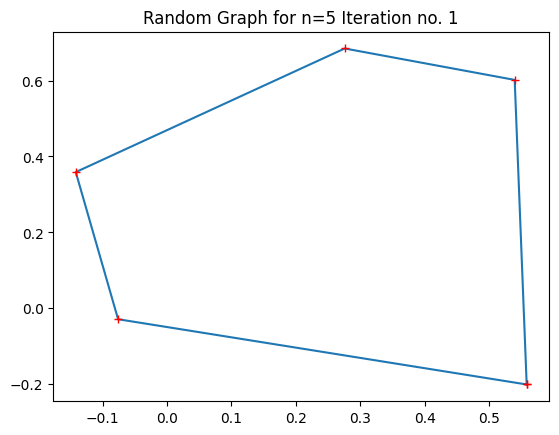

In [33]:
new_x_norm, new_y_norm = new_graph_normalized(x, y)
plot_graph(new_x_norm, new_y_norm, i=1)
plt.show()

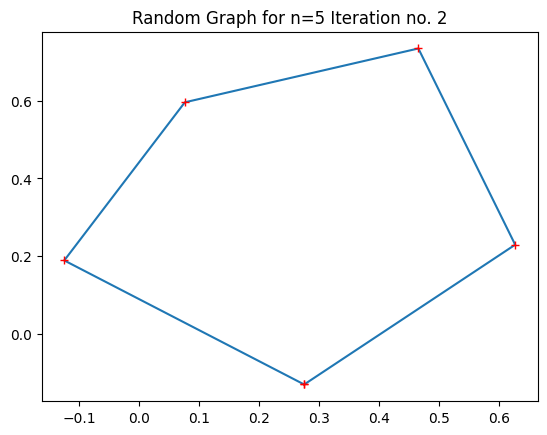

In [35]:
new_x_norm, new_y_norm = new_graph_normalized(new_x_norm, new_y_norm)
plot_graph(new_x_norm, new_y_norm, i=2)
plt.show()

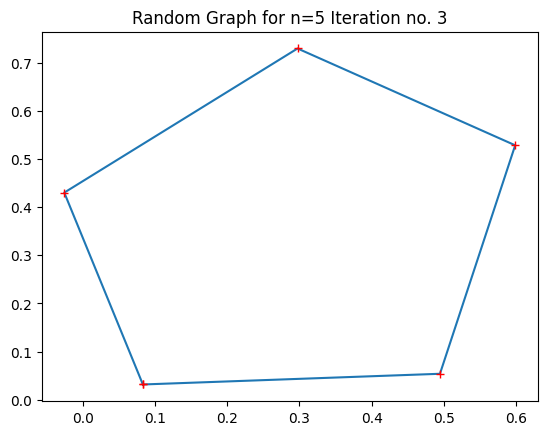

In [36]:
new_x_norm, new_y_norm = new_graph_normalized(new_x_norm, new_y_norm)
plot_graph(new_x_norm, new_y_norm, i=3)
plt.show()

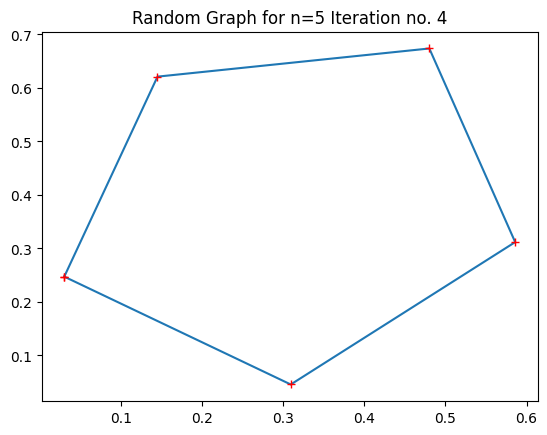

In [37]:
new_x_norm, new_y_norm = new_graph_normalized(new_x_norm, new_y_norm)
plot_graph(new_x_norm, new_y_norm, i=4)
plt.show()

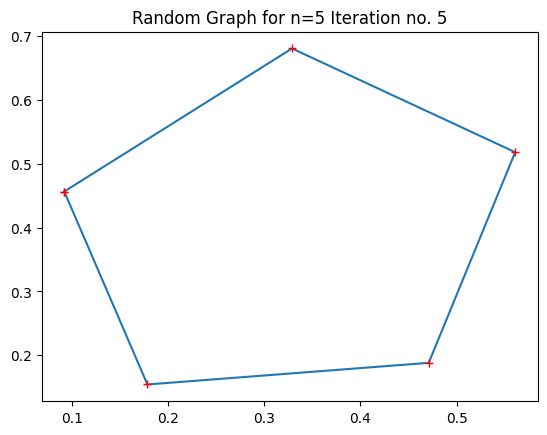

In [38]:
new_x_norm, new_y_norm = new_graph_normalized(new_x_norm, new_y_norm)
plot_graph(new_x_norm, new_y_norm, i=5)
plt.show()

In [40]:
np.linalg.vector_norm(new_x_norm - new_x), np.linalg.vector_norm(new_y_norm - new_y)

(np.float64(0.22540106480116612), np.float64(0.29759220552218363))

### Calculate convergence

Calculate number of iterations it takes to converge

In [ ]:
max_iterations = 1e9
acceptable_error = 1e-15

In [61]:
old_x, old_y = x, y
for i in range(int(max_iterations)):
    new_x, new_y = new_graph(old_x, old_y)
    if(np.linalg.vector_norm(new_x - old_x) + np.linalg.vector_norm(new_y - old_y) < acceptable_error):
        print(f"Converges in {i+1} iterations")
        break
    old_x, old_y = new_x, new_y

Converges in 59 iterations


In [58]:
old_x, old_y = x, y
for i in range(int(max_iterations)):
    new_x, new_y = new_graph_normalized(old_x, old_y)
    if(np.linalg.vector_norm(new_x - old_x) + np.linalg.vector_norm(new_y - old_y) < acceptable_error):
        print(f"Converges in {i+1} iterations")
        break
    old_x, old_y = new_x, new_y

Converges in 58 iterations


**Converged Graph**

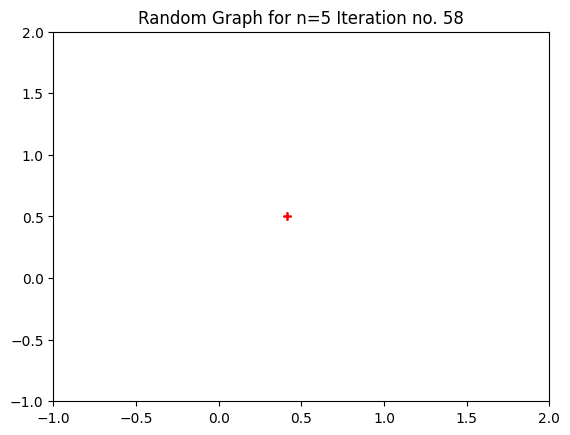

In [62]:
plot_graph(old_x, old_y, i=58)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

**Converged Point**

In [63]:
np.mean(old_x, axis=0), np.mean(old_y, axis=0)

(array([0.41463545]), array([0.50778186]))

### Conclusion

After each iteration it gets smaller and smaller and rotates, until it converges to one point